# **Nama:   Khulika Malkan**

# **NIM:    2311110057**

# **Kelas:  S1SD04-O2**

***1. Import Library***

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

***2. Memanggil data***

Proses memanggil data ini bertujuan untuk memastikan data telah dimuat dengan benar sebelum proses analisis.

In [13]:
data = pd.read_excel("/content/CAD alizadeh.xls")
data

,No,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,1,53,90,175,Male,29.387755,0,1,1,0,...,4.7,141,5700,39,52,261,50,0,N,Cad
1,2,67,70,157,Fmale,28.398718,0,1,0,0,...,4.7,156,7700,38,55,165,40,4,N,Cad
2,3,54,54,164,Male,20.077335,0,0,1,0,...,4.7,139,7400,38,60,230,40,2,mild,Cad
3,4,66,67,158,Fmale,26.838648,0,1,0,0,...,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,5,50,87,153,Fmale,37.165193,0,1,0,0,...,4.0,140,9200,55,39,274,50,0,Severe,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,58,84,168,Male,29.761905,0,0,0,0,...,4.8,146,8500,34,58,251,45,0,N,Cad
299,300,55,64,152,Fmale,27.700831,0,0,0,0,...,4.0,139,11400,16,80,377,40,0,mild,Normal
300,301,48,77,160,Fmale,30.078125,0,1,0,0,...,4.0,140,9000,35,55,279,55,0,N,Normal
301,302,57,90,159,Fmale,35.599858,1,0,0,0,...,3.8,141,3800,48,40,208,55,0,N,Normal


***3. Menampilkan data***

Menampilkan 5 baris pertama data untuk melihat struktur awal data, seperti jumlah kolom, tipe data, dan beberapa contoh nilai.

In [45]:
print("Data Awal:")
data.head(6)

Data Awal:


,No,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,1,53,90,175,1,29.387755,0,1,1,0,...,4.7,141,5700,39,52,261,50,0,1,0
1,2,67,70,157,0,28.398718,0,1,0,0,...,4.7,156,7700,38,55,165,40,4,1,0
2,3,54,54,164,1,20.077335,0,0,1,0,...,4.7,139,7400,38,60,230,40,2,3,0
3,4,66,67,158,0,26.838648,0,1,0,0,...,4.4,142,13000,18,72,742,55,0,2,1
4,5,50,87,153,0,37.165193,0,1,0,0,...,4.0,140,9200,55,39,274,50,0,2,1
5,6,50,75,175,1,24.489796,0,0,1,0,...,4.2,141,7300,26,66,194,50,0,1,0


***4. Preprocessing data:
memeriksa apakah ada yang kosong***

Dalam proses preprocessing data dilakukan pengecekkan apakah ada nilai kosong dengan df.isnull().sum(). Jika ada nilai kosong, kita menggantinya dengan median dari kolom tersebut menggunakan df.fillna(df.median(), inplace=True). Hal ini bertujuan untuk menghindari error saat melakukan analisis karena adanya nilai kosong dan menggunakan median untuk menghindari bias akibat nilai ekstrem.

In [15]:
data.shape

(303, 56)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   No                     303 non-null    int64  
 1   Age                    303 non-null    int64  
 2   Weight                 303 non-null    int64  
 3   Length                 303 non-null    int64  
 4   Sex                    303 non-null    object 
 5   BMI                    303 non-null    float64
 6   DM                     303 non-null    int64  
 7   HTN                    303 non-null    int64  
 8   Current Smoker         303 non-null    int64  
 9   EX-Smoker              303 non-null    int64  
 10  FH                     303 non-null    int64  
 11  Obesity                303 non-null    object 
 12  CRF                    303 non-null    object 
 13  CVA                    303 non-null    object 
 14  Airway disease         303 non-null    object 
 15  Thyroi

In [18]:
data.isnull().sum()

,0
No,0
Age,0
Weight,0
Length,0
Sex,0
BMI,0
DM,0
HTN,0
Current Smoker,0
EX-Smoker,0


***5. Mengubah semua kolom menjadi bernilai numerik***

Label Encoding digunakan untuk mengonversi kategori menjadi angka karena seperti yang kita ketahui bahwa model machine learning hanya bekerja dengan angka, sehingga perlu mengubah data kategorikal menjadi numerik.


In [19]:
data.dtypes

,0
No,int64
Age,int64
Weight,int64
Length,int64
Sex,object
BMI,float64
DM,int64
HTN,int64
Current Smoker,int64
EX-Smoker,int64


In [21]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [22]:
print("\nData setelah konversi ke numerik:")
data


Data setelah konversi ke numerik:


,No,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,1,53,90,175,1,29.387755,0,1,1,0,...,4.7,141,5700,39,52,261,50,0,1,0
1,2,67,70,157,0,28.398718,0,1,0,0,...,4.7,156,7700,38,55,165,40,4,1,0
2,3,54,54,164,1,20.077335,0,0,1,0,...,4.7,139,7400,38,60,230,40,2,3,0
3,4,66,67,158,0,26.838648,0,1,0,0,...,4.4,142,13000,18,72,742,55,0,2,1
4,5,50,87,153,0,37.165193,0,1,0,0,...,4.0,140,9200,55,39,274,50,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,58,84,168,1,29.761905,0,0,0,0,...,4.8,146,8500,34,58,251,45,0,1,0
299,300,55,64,152,0,27.700831,0,0,0,0,...,4.0,139,11400,16,80,377,40,0,3,1
300,301,48,77,160,0,30.078125,0,1,0,0,...,4.0,140,9000,35,55,279,55,0,1,1
301,302,57,90,159,0,35.599858,1,0,0,0,...,3.8,141,3800,48,40,208,55,0,1,1


***6. Melakukan proses normalisasi pada masing-masing atribut***

Dalam proses normalisasi, saya menggunakan MinMaxScaler() untuk mengubah nilai menjadi rentang 0 hingga 1. Hal ini bertujuan untuk membuat semua fitur memiliki skala yang sama sehingga tidak ada fitur yang mendominasi dalam perhitungan jarak atau model. MinMaxScaler memastikan semua nilai berada dalam range 0-1, yang berguna untuk algoritma seperti KNN, Neural Network, dan algoritma berbasis jarak lainnya.

In [23]:
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [47]:
print("\nData setelah normalisasi:")
print(data_normalized.head(4))


Data setelah normalisasi:
         No       Age    Weight    Length  Sex       BMI   DM  HTN  \
0  0.000000  0.410714  0.583333  0.729167  1.0  0.494721  0.0  1.0   
1  0.003311  0.660714  0.305556  0.354167  0.0  0.451314  0.0  1.0   
2  0.006623  0.428571  0.083333  0.500000  1.0  0.086105  0.0  0.0   
3  0.009934  0.642857  0.263889  0.375000  0.0  0.382846  0.0  1.0   

   Current Smoker  EX-Smoker  ...         K        Na       WBC     Lymph  \
0             1.0        0.0  ...  0.472222  0.464286  0.139860  0.603774   
1             0.0        0.0  ...  0.472222  1.000000  0.279720  0.584906   
2             1.0        0.0  ...  0.472222  0.392857  0.258741  0.584906   
3             0.0        0.0  ...  0.388889  0.500000  0.650350  0.207547   

       Neut       PLT    EF-TTE  Region RWMA       VHD  Cath  
0  0.350877  0.329149  0.777778          0.0  0.333333   0.0  
1  0.403509  0.195258  0.555556          1.0  0.333333   0.0  
2  0.491228  0.285914  0.555556          0.5  1

***7. Visualisasi untuk Mengecek Keberhasilan Normalisasi dengan Boxplot***

Selanjutnya saya membandingkan distribusi data sebelum dan setelah normalisasi dengan boxplot. Jika normalisasi berhasil, boxplot setelah normalisasi akan memiliki nilai dalam rentang 0 hingga 1.

<ipython-input-37-1c843cfac7ec>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(data.columns, rotation=90)
<ipython-input-37-1c843cfac7ec>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(data_normalized.columns, rotation=90)


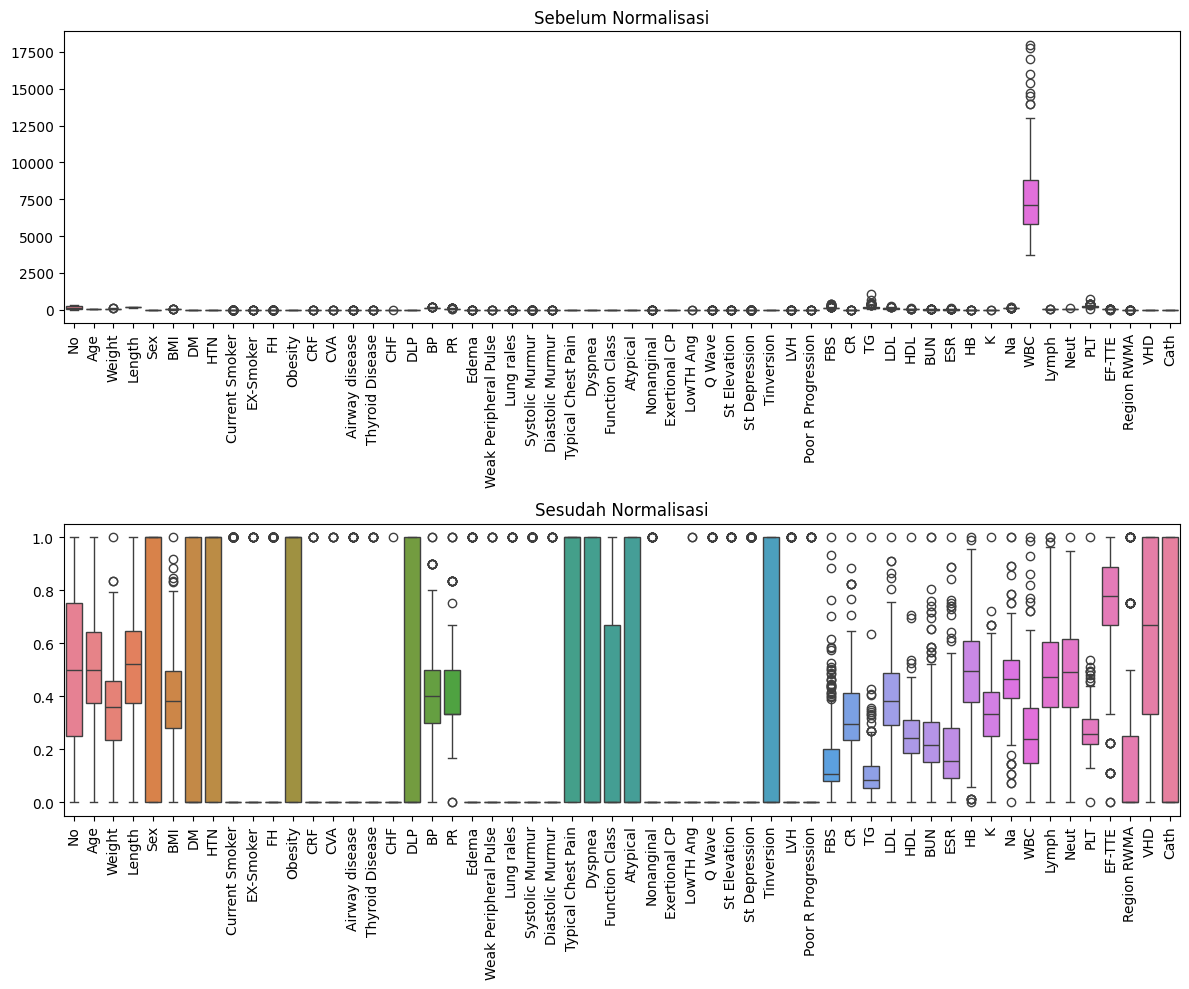

In [37]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
# Sebelum Normalisasi
sns.boxplot(data=data, ax=axes[0])
axes[0].set_title("Sebelum Normalisasi")
axes[0].set_xticklabels(data.columns, rotation=90)

# Sesudah Normalisasi
sns.boxplot(data=data_normalized, ax=axes[1])
axes[1].set_title("Sesudah Normalisasi")
axes[1].set_xticklabels(data_normalized.columns, rotation=90)
plt.tight_layout()
plt.show()

***8. Menampilkan Statistik Deskriptif Sebelum dan Sesudah Normalisasi***

Dengan melihat ringkasan statistik sebelum dan sesudah normalisasi, kita dapat mengetahui  apakah nilai min, max, mean, dan std dev sudah berada dalam skala yang lebih seragam [0-1] setelah normalisasi.

In [61]:
print("\nSebelum Normalisasi (range nilai asli):")
print(data.describe().T)
print("\nSesudah Normalisasi (range nilai dalam skala 0-1):")
print(data_normalized.describe().T)


Sebelum Normalisasi (range nilai asli):
                       count         mean          std          min  \
No                     303.0   152.000000    87.612784     1.000000   
Age                    303.0    58.897690    10.392278    30.000000   
Weight                 303.0    73.831683    11.987358    48.000000   
Length                 303.0   164.716172     9.327661   140.000000   
Sex                    303.0     0.580858     0.494235     0.000000   
BMI                    303.0    27.248339     4.098865    18.115413   
DM                     303.0     0.297030     0.457706     0.000000   
HTN                    303.0     0.590759     0.492507     0.000000   
Current Smoker         303.0     0.207921     0.406491     0.000000   
EX-Smoker              303.0     0.033003     0.178941     0.000000   
FH                     303.0     0.158416     0.365734     0.000000   
Obesity                303.0     0.696370     0.460586     0.000000   
CRF                    303.0     0.0

***9. Insight yang Didapat Setelah Normalisasi***

> **Data Berada dalam Skala yang Sama**


1.   Sebelum normalisasi, Beberapa fitur memiliki skala yang jauh berbeda, misalnya:
*   Kolom A: 1 - 1000
*   Kolom B: 0.01 - 5

2.   Setelah normalisasi, Semua fitur berada dalam rentang 0 - 1, sehingga lebih stabil dalam model ML.


> **Mempermudah Model Machine Learning**


Model seperti KNN, Neural Network, dan SVM bekerja lebih baik karena perbedaan skala antar fitur sudah diminimalkan.


> **Distribusi Data Terlihat Lebih Konsisten**


Dengan boxplot, kita bisa melihat apakah ada perubahan bentuk distribusi setelah normalisasi.
Jika distribusi tetap sama tetapi dalam skala yang lebih kecil, berarti normalisasi berhasil.

***10. Kesimpulan***

Normalisasi data sangat penting dalam machine learning karena membantu menyamakan skala semua fitur, sehingga model bekerja lebih optimal dan tidak dipengaruhi oleh perbedaan skala antar variabel. Dari hasil analisis, kita melihat bahwa setelah normalisasi, semua nilai berada dalam rentang 0 hingga 1 dan tidak ada fitur yang mendominasi secara berlebihan. Visualisasi seperti boxplot menunjukkan bahwa normalisasi telah berhasil dan membuat data lebih mudah digunakan dalam model prediksi. Dengan normalisasi yang baik, model dapat bekerja lebih stabil, akurat, dan lebih cepat dalam memproses data.

[Link Collab Khulika Malkan
NIM. 2311110057](https://colab.research.google.com/drive/1YShlO9r7LTp_6gXrPDjLqLZlus_eTonx#scrollTo=j6ZhRFYYo20n&uniqifier=1)